## Zusammenhang zwischen Wohlstand und Flüchtlingsaufnahme

In diesem Notebook wird untersucht, ob ein statistischer Zusammenhang zwischen dem durchschnittlichen Wohlstand eines Landes und seiner durchschnittlichen relativen Flüchtlingsaufnahme besteht.  
Der Wohlstand wird dabei durch das durchschnittliche GDP pro Kopf im Zeitraum von 2000 bis 2019 gemessen, während die Flüchtlingsaufnahme durch den durchschnittlichen `refugee_share` im gleichen Zeitraum beschrieben wird.

Als **Nullhypothese (H0)** wird angenommen, dass kein Zusammenhang zwischen dem durchschnittlichen Wohlstand eines Landes und seiner relativen Flüchtlingsaufnahme besteht.  
Die **Alternativhypothese (H1)** besagt hingegen, dass Länder mit höherem durchschnittlichen Wohlstand im Mittel eine andere, zum Beispiel höhere, relative Flüchtlingsaufnahme aufweisen.

Zur Analyse werden die Daten zunächst auf den Zeitraum 2000 bis 2019 eingeschränkt und anschließend auf Länderebene aggregiert.  
Neben einer globalen Betrachtung werden die Zusammenhänge zusätzlich getrennt nach Kontinenten analysiert, um mögliche regionale Unterschiede sichtbar zu machen.  
Die Auswertung kombiniert grafische Methoden (Scatterplots, Bubble-Plots, Boxplots, Heatmaps) mit einer formalen linearen Regressions- und Hypothesentestung.


Dieser Abschnitt lädt die Daten, filtert den Zeitraum 2000 bis 2019 und aggregiert die Beobachtungen auf eine Zeile pro Land, wobei durchschnittliches GDP pro Kopf und durchschnittliche relative Flüchtlingsaufnahme berechnet werden.

In [1]:
import pandas as pd
import numpy as np

path = r"../../output_csv_files/output_with_continent.csv"
df = pd.read_csv(path)

df["log_GDP"] = np.log(df["GDP_per_capita"])

df_period = df[(df["Year"] >= 2000) & (df["Year"] <= 2019)]

print("Form vor Aggregation:", df_period.shape)

df_country = (
    df_period
    .groupby(["country", "continent"], as_index=False)
    .agg({
        "GDP_per_capita": "mean",
        "refugee_share": "mean"
    })
)

df_country["log_GDP"] = np.log(df_country["GDP_per_capita"])

print("Form nach Aggregation:", df_country.shape)
df_country.head()


Form vor Aggregation: (2680, 11)
Form nach Aggregation: (182, 5)


,country,continent,GDP_per_capita,refugee_share,log_GDP
0,Afghanistan,Asia,401.186287,0.001172,5.994426
1,Albania,Europe,3328.632745,0.000134,8.110317
2,Algeria,Africa,4072.478982,0.003427,8.312007
3,Angola,Africa,2796.325913,0.001040,7.936062
4,Antigua and Barbuda,North America,15687.100380,0.000036,9.660594


Der Scatterplot zeigt für jedes Land einen Punkt, wobei auf der x-Achse das durchschnittliche logarithmierte GDP pro Kopf und auf der y-Achse die durchschnittliche relative Flüchtlingsaufnahme im Zeitraum 2000 bis 2019 dargestellt ist.
 
Es ist kein klarer linearer Zusammenhang zwischen Wohlstand und relativer Flüchtlingsaufnahme erkennbar. Die meisten Länder liegen unabhängig vom Wohlstandsniveau sehr nahe bei null, während wenige Länder mit deutlich höherer Flüchtlingsaufnahme als Ausreisser auftreten. Diese Ausreisser finden sich sowohl bei mittleren als auch bei höheren Einkommensniveaus, was darauf hindeutet, dass Faktoren wie geografische Lage, regionale Konflikte oder politische Rahmenbedingungen eine größere Rolle spielen als der reine Wohlstand.

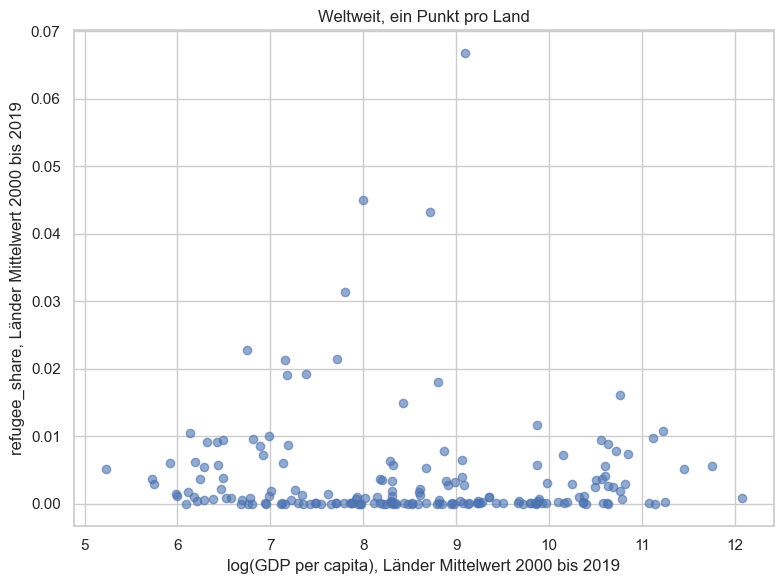

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8,6))
plt.scatter(df_country["log_GDP"], df_country["refugee_share"], alpha=0.6)

plt.xlabel("log(GDP per capita), Länder Mittelwert 2000 bis 2019")
plt.ylabel("refugee_share, Länder Mittelwert 2000 bis 2019")
plt.title("Weltweit, ein Punkt pro Land")

plt.tight_layout()
plt.show()


### Lineare Regression: Wohlstand und Flüchtlingsaufnahme (weltweit)

In diesem Abschnitt wird eine einfache lineare Regression geschätzt, um den Zusammenhang zwischen dem durchschnittlichen logarithmierten GDP pro Kopf und der durchschnittlichen relativen Flüchtlingsaufnahme auf Länderebene zu quantifizieren.  
Die Regressionsparameter werden manuell berechnet und anschließend mithilfe einer t-Statistik statistisch getestet.

**Interpretation des Outputs:**  
Die geschätzte Steigung β ist sehr klein und negativ (β ≈ −0.00025), was auf einen minimalen negativen Zusammenhang hindeutet. Der zugehörige p-Wert von etwa 0.53 liegt jedoch deutlich über üblichen Signifikanzniveaus, sodass die Nullhypothese nicht verworfen werden kann.  
Damit zeigt sich weltweit kein statistisch signifikanter Zusammenhang zwischen dem durchschnittlichen Wohlstand eines Landes und seiner relativen Flüchtlingsaufnahme im Zeitraum 2000 bis 2019.


In [3]:
import numpy as np
from scipy.stats import t

# x = log(GDP) Mittelwert pro Land
x = df_country["log_GDP"].values

# y = refugee_share Mittelwert pro Land
y = df_country["refugee_share"].values

n = len(x)
print("Anzahl Länder:", n)

# Mittelwerte
x_mean = x.mean()
y_mean = y.mean()

# Steigung beta
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)
beta = numerator / denominator

# Achsenabschnitt alpha
alpha = y_mean - beta * x_mean

# Vorhersage & Residuen
y_hat = alpha + beta * x
residuals = y - y_hat

# Residuenvarianz sigma²
sigma_squared = np.sum(residuals**2) / (n - 2)

# Standardfehler der Steigung
SE_beta = np.sqrt(sigma_squared / denominator)

# t-Statistik
t_stat = beta / SE_beta

# p-Wert
p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-2))

print("\nErgebnisse Welt (pro Land)")
print("Steigung beta:", beta)
print("Standardfehler:", SE_beta)
print("t-Statistik:", t_stat)
print("p-Wert:", p_value)
print("Achsenabschnitt alpha:", alpha)


Anzahl Länder: 182

Ergebnisse Welt (pro Land)
Steigung beta: -0.00024830888486619603
Standardfehler: 0.00039396661139877074
t-Statistik: -0.630279007615849
p-Wert: 0.5293113859204994
Achsenabschnitt alpha: 0.005946059021446886


### Lineare Regression nach Kontinenten

In diesem Abschnitt wird die zuvor durchgeführte lineare Regression getrennt nach Kontinenten wiederholt, um zu prüfen, ob sich regionale Unterschiede im Zusammenhang zwischen Wohlstand und relativer Flüchtlingsaufnahme zeigen.  
Für jeden Kontinent wird die Steigung der Regressionsgeraden sowie deren statistische Signifikanz separat berechnet und in einer Übersichtstabelle zusammengefasst.

**Interpretation des Outputs:**  
Für keinen der Kontinente ist der geschätzte Zusammenhang statistisch signifikant, da alle p-Werte deutlich über gängigen Signifikanzniveaus liegen. Die Vorzeichen der Steigungen variieren zwischen den Kontinenten, was auf uneinheitliche und instabile Zusammenhänge hindeutet.  
Insbesondere in Kontinenten mit wenigen Ländern, wie Südamerika oder Ozeanien, sind die Schätzungen sehr unsicher und stark von einzelnen Beobachtungen beeinflusst. Insgesamt bestätigen die Ergebnisse auf Kontinentalebene die globale Analyse, dass kein robuster Zusammenhang zwischen Wohlstand und relativer Flüchtlingsaufnahme nachweisbar ist.


In [4]:
import numpy as np
from scipy.stats import t
import pandas as pd

continents = df_country["continent"].unique()

results = []

for cont in continents:
    print("Kontinent:", cont)
    
    sub = df_country[df_country["continent"] == cont]

    x = sub["log_GDP"].values
    y = sub["refugee_share"].values
    n = len(x)

    print("Anzahl Länder:", n)

    # Mittelwerte
    x_mean = x.mean()
    y_mean = y.mean()

    # Steigung beta
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean)**2)
    beta = numerator / denominator

    # Achsenabschnitt alpha
    alpha = y_mean - beta * x_mean

    # Vorhersage und Residuen
    y_hat = alpha + beta * x
    residuals = y - y_hat

    # Residuenvarianz sigma²
    sigma_squared = np.sum(residuals**2) / (n - 2)

    # Standardfehler der Steigung
    SE_beta = np.sqrt(sigma_squared / denominator)

    # t-Statistik
    t_stat = beta / SE_beta

    # p-Wert (zweiseitig)
    p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-2))

    # Ausgabe
    print("Steigung beta:", beta)
    print("Standardfehler:", SE_beta)
    print("t-Statistik:", t_stat)
    print("p-Wert:", p_value)
    print("Achsenabschnitt:", alpha)

    # Speichern
    results.append([cont, beta, SE_beta, t_stat, p_value, alpha])

# Übersichtstabelle
results_df = pd.DataFrame(results, columns=["Kontinent", "beta", "SE_beta", "t_stat", "p_value", "alpha"])
results_df


Kontinent: Asia
Anzahl Länder: 44
Steigung beta: -0.0005447365864835699
Standardfehler: 0.0010883417216143681
t-Statistik: -0.5005198051909162
p-Wert: 0.619321929553293
Achsenabschnitt: 0.009305494651087463
Kontinent: Europe
Anzahl Länder: 38
Steigung beta: 0.0014965479983543675
Standardfehler: 0.0006804454762380455
t-Statistik: 2.1993650492443253
p-Wert: 0.034358882635279864
Achsenabschnitt: -0.011067089645276522
Kontinent: Africa
Anzahl Länder: 51
Steigung beta: -0.0005376709524632967
Standardfehler: 0.000821851297880256
t-Statistik: -0.6542192655168569
p-Wert: 0.5160295180274534
Achsenabschnitt: 0.008671083710550916
Kontinent: North America
Anzahl Länder: 26
Steigung beta: 0.00030920334199340454
Standardfehler: 0.0002524336837430639
t-Statistik: 1.224889394349301
p-Wert: 0.23250349894180777
Achsenabschnitt: -0.0021545300113921095
Kontinent: South America
Anzahl Länder: 12
Steigung beta: -0.0002643817828512252
Standardfehler: 0.0012377807077216302
t-Statistik: -0.21359339437263483
p-

,Kontinent,beta,SE_beta,t_stat,p_value,alpha
0,Asia,-0.000545,0.001088,-0.500520,0.619322,0.009305
1,Europe,0.001497,0.000680,2.199365,0.034359,-0.011067
2,Africa,-0.000538,0.000822,-0.654219,0.516030,0.008671
3,North America,0.000309,0.000252,1.224889,0.232503,-0.002155
4,South America,-0.000264,0.001238,-0.213593,0.835156,0.003185
5,Oceania,0.002834,0.006044,0.468939,0.650265,-0.018040


### Scatterplots nach Kontinenten: Wohlstand und Flüchtlingsaufnahme

Die Scatterplots zeigen den Zusammenhang zwischen dem durchschnittlichen logarithmierten GDP pro Kopf und der durchschnittlichen relativen Flüchtlingsaufnahme getrennt nach Kontinenten, wobei jeder Punkt ein Land repräsentiert.

**Interpretation:**  
In keinem der Kontinente ist ein klarer, konsistenter Trend erkennbar. In Asien und Afrika treten einzelne Länder mit hoher Flüchtlingsaufnahme auf, unabhängig vom Wohlstandsniveau. Europa und Nordamerika zeigen eine leichte Streuung mit tendenziell höheren Aufnahmequoten bei wohlhabenderen Ländern, jedoch ohne klaren linearen Zusammenhang.  
In Südamerika und Ozeanien ist die Anzahl der Länder gering, wodurch einzelne Ausreißer das Bild dominieren und belastbare Aussagen erschweren. Insgesamt unterstreichen die Grafiken, dass regionale Unterschiede existieren, der Zusammenhang zwischen Wohlstand und Flüchtlingsaufnahme jedoch schwach und nicht eindeutig ist.


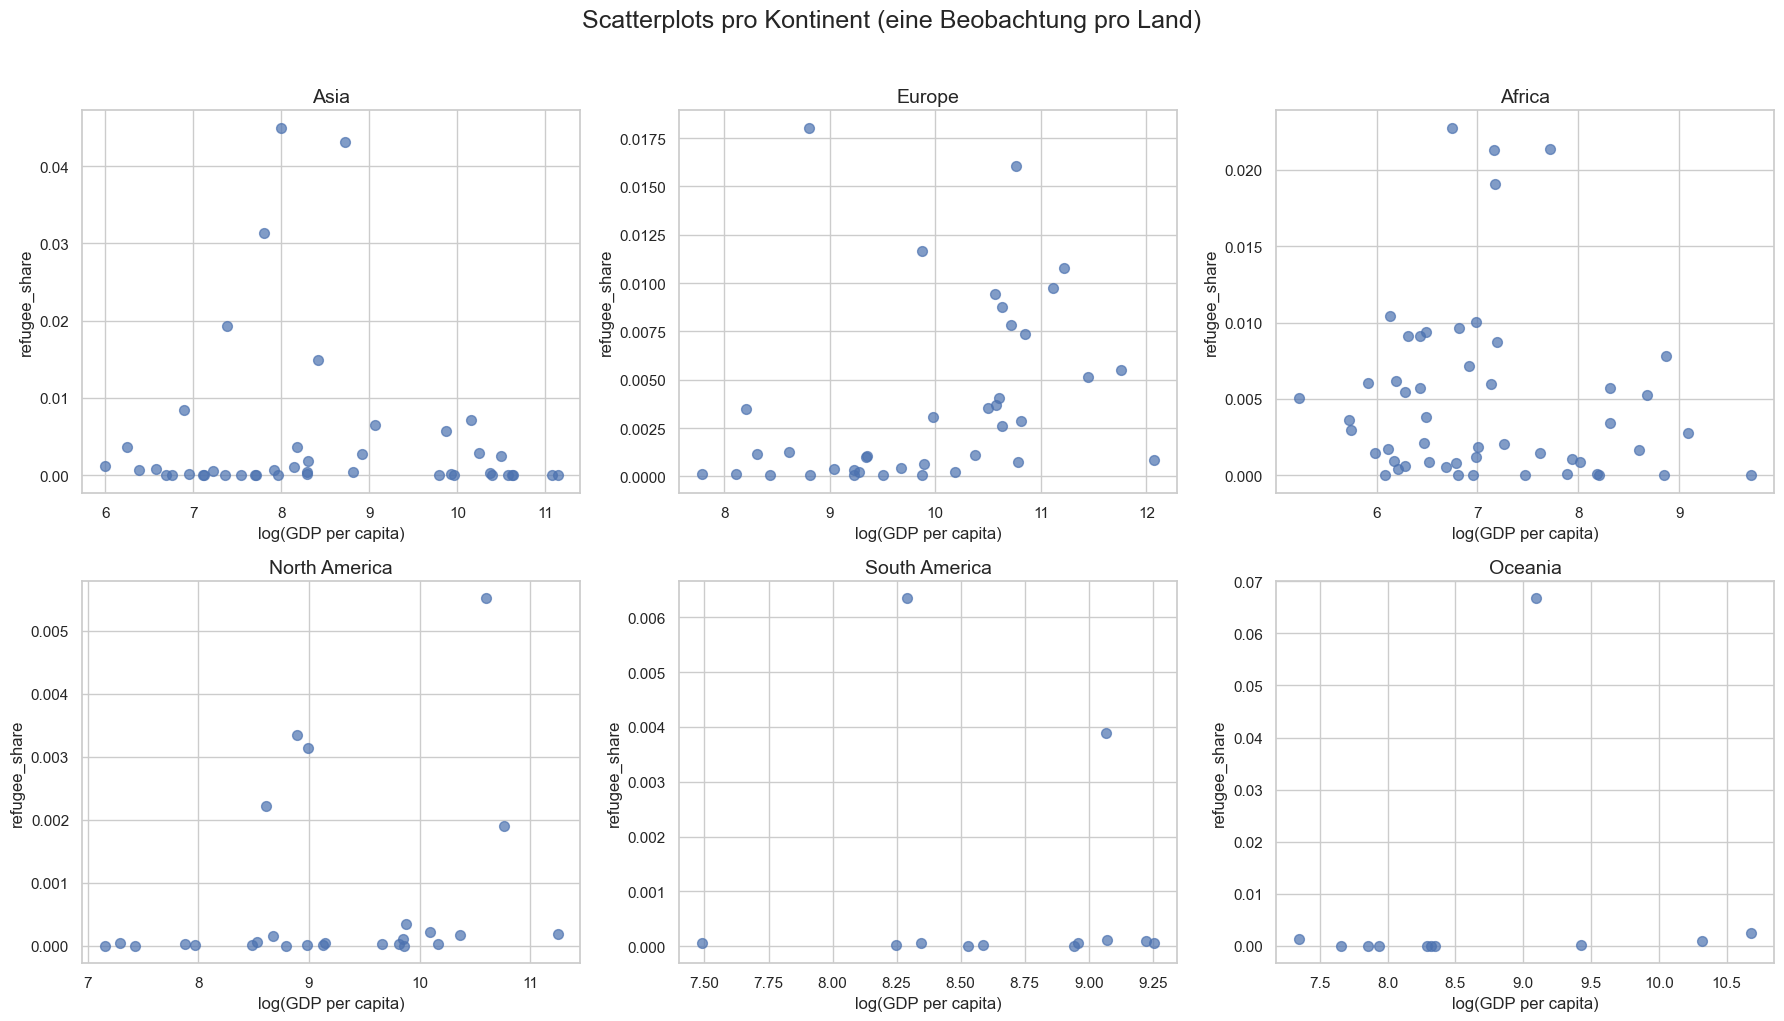

In [5]:
continents = df_country["continent"].unique()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, cont in enumerate(continents):
    ax = axes[i]
    sub = df_country[df_country["continent"] == cont]

    ax.scatter(
        sub["log_GDP"], 
        sub["refugee_share"],
        alpha=0.7,
        s=50
    )

    ax.set_title(cont, fontsize=14)
    ax.set_xlabel("log(GDP per capita)")
    ax.set_ylabel("refugee_share")

plt.suptitle("Scatterplots pro Kontinent (eine Beobachtung pro Land)", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()
